In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Classe criada para coletar posições x,y de uma figura
class collect_points:
    def __init__(self):
        self.points = [] #atributo que armazena os pontos

    def select_point(self,event,x,y,flags,param,radius=3,color=(255,0,0)):
        # O evento utilizado como referência para 2 cliques é o botão esquerdo
            if event == cv2.EVENT_LBUTTONDBLCLK:
                #pinta um circulo para indicar a região selecionada
                cv2.circle(img,(x,y),radius,color,-1)
                self.points.append((x,y))

In [17]:
coordenadas = collect_points()

#Criando uma imagem qualquer de dimensões 512x512 pixels e 3 canais de cores
img = np.zeros((512,512,3), np.uint8) + np.random.randint(0,155,size=(512,512,3),dtype=np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',coordenadas.select_point)

while True:
    # Disparando uma janela com a escala de cor corrigida para RGB
    cv2.imshow('image',cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if cv2.waitKey(30) & 0XFF == 27:
        break
cv2.destroyAllWindows()

In [18]:
pts = np.asarray(coordenadas.points,dtype=np.int32).reshape((-1,1,2))

In [19]:
pts

array([[[ 77,  72]],

       [[403,  69]],

       [[392, 376]],

       [[246, 292]],

       [[146, 384]],

       [[ 89, 225]],

       [[165, 164]]], dtype=int32)

In [20]:
pts.shape

(7, 1, 2)

In [21]:
img_teste = np.int32(img)

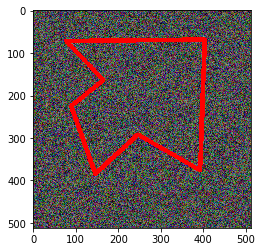

In [22]:
cv2.polylines(img_teste,[pts],isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(img_teste)